In [1]:
import lightkurve as lk
import numpy as np
from astropy.timeseries import LombScargle
from astropy.io import fits

In [8]:
hdul = fits.open('tess25lc.fits')
hdr = hdul[1].header
print(repr(hdr)) 
hdul.close()        


XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                18489 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [41]:
search_result = lk.search_tesscut('SBSS 1310+561', sector=15)
search_result

#,observation,target_name,productFilename,distance
0,TESS Sector 15,SBSS 1310+561,TESSCut,0.0


In [42]:
lk.log.setLevel('INFO')

In [43]:
tpf = search_result.download(cutout_size=30)

1% (7/1197) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
INFO:lightkurve.utils:1% (7/1197) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


In [44]:
target_mask = tpf.create_threshold_mask(threshold=15, reference_pixel='center')

print(type(target_mask))

<class 'numpy.ndarray'>


In [24]:
target_mask = np.array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, True,  True, True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]])
n_target_pixels = target_mask.sum()

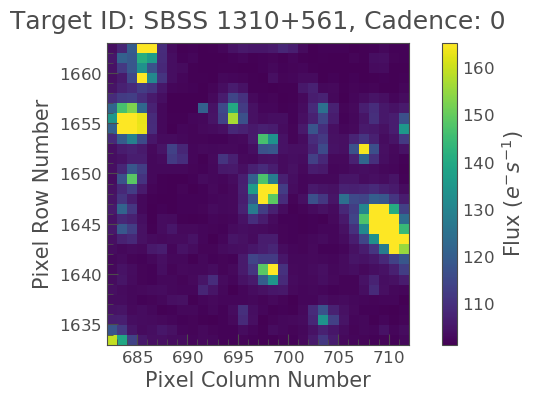

In [45]:
tpf.plot()

In [46]:
target_lc = tpf.to_lightcurve(aperture_mask=target_mask)

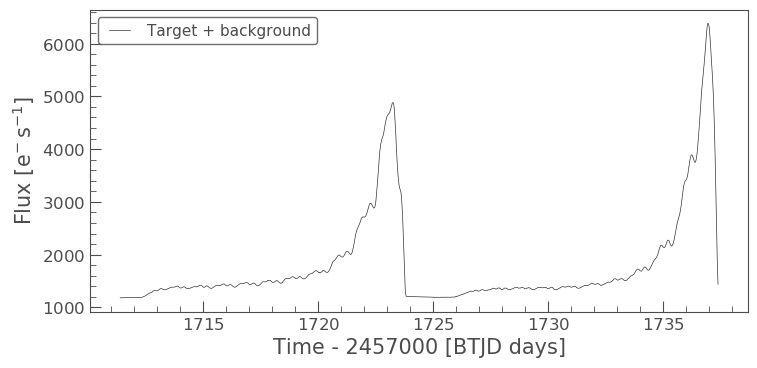

In [47]:
target_lc.plot(label='Target + background')

In [48]:
background_mask = ~tpf.create_threshold_mask(threshold=0.001, reference_pixel=None)

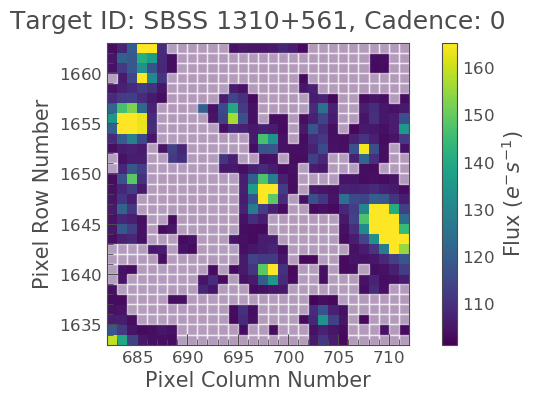

In [49]:
tpf.plot(aperture_mask=background_mask, mask_color='w')

In [50]:
n_background_pixels = background_mask.sum()
n_background_pixels

450

In [51]:
background_lc_per_pixel = tpf.to_lightcurve(aperture_mask=background_mask) / n_background_pixels

In [52]:
background_estimate_lc = background_lc_per_pixel * n_target_pixels

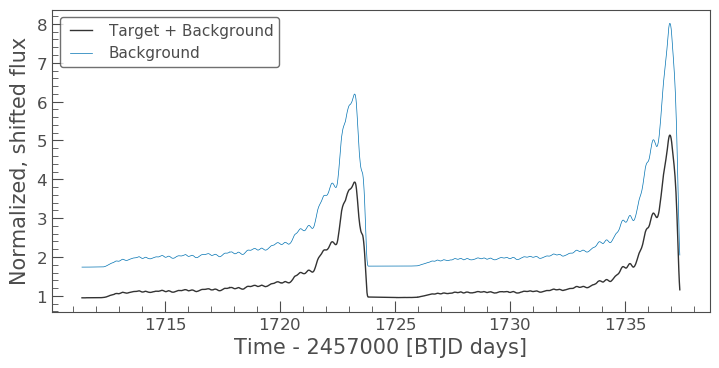

In [53]:
common_normalization = np.nanpercentile(target_lc.flux, 10)
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=1);
(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux');

In [54]:
corrected_lc = target_lc - background_estimate_lc.flux

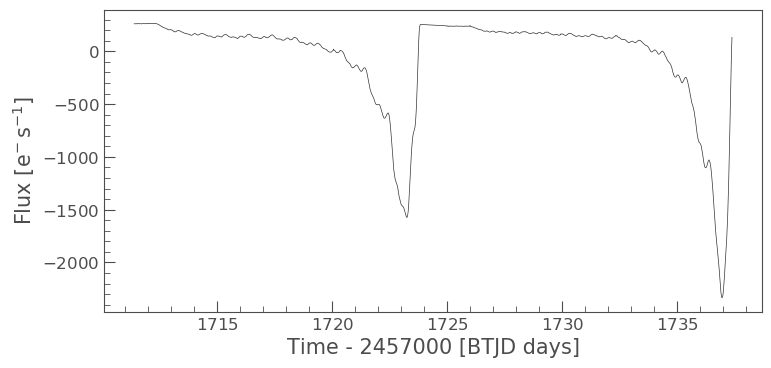

In [55]:
corrected_lc.plot()

In [56]:
flux15 = corrected_lc.flux
error15 = corrected_lc.flux_err
time15 = corrected_lc.time

In [57]:
search_result = lk.search_tesscut('SBSS 1310+561', sector=16)
search_result

#,observation,target_name,productFilename,distance
0,TESS Sector 16,SBSS 1310+561,TESSCut,0.0


In [58]:
tpf = search_result.download(cutout_size=30)

0% (3/1121) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
INFO:lightkurve.utils:0% (3/1121) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


In [59]:
target_mask = np.array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, True,  True, True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]])
n_target_pixels = target_mask.sum()

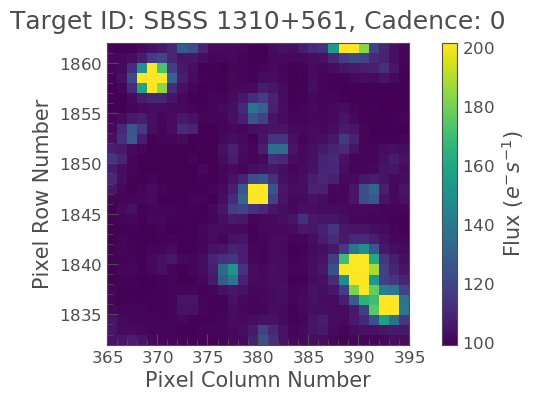

In [60]:
tpf.plot()

In [39]:
target_lc = tpf.to_lightcurve(aperture_mask=target_mask)

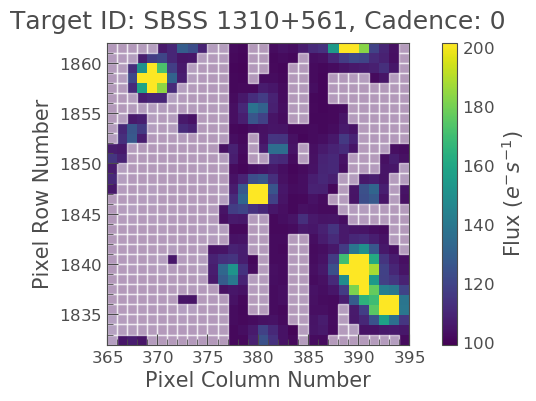

In [40]:
background_mask = ~tpf.create_threshold_mask(threshold=0.001, reference_pixel=None)
tpf.plot(aperture_mask=background_mask, mask_color='w')

In [28]:
n_background_pixels = background_mask.sum()
n_background_pixels

200

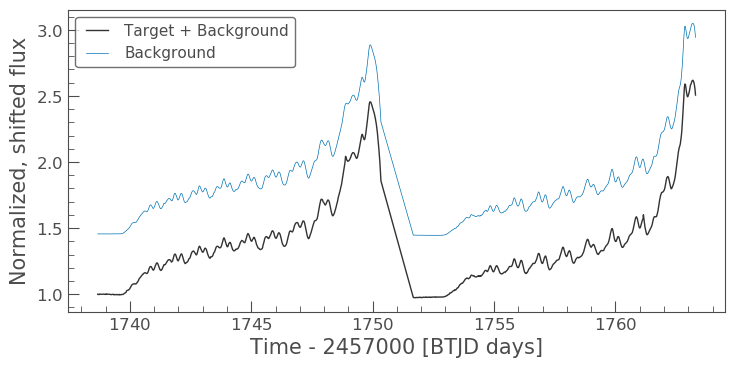

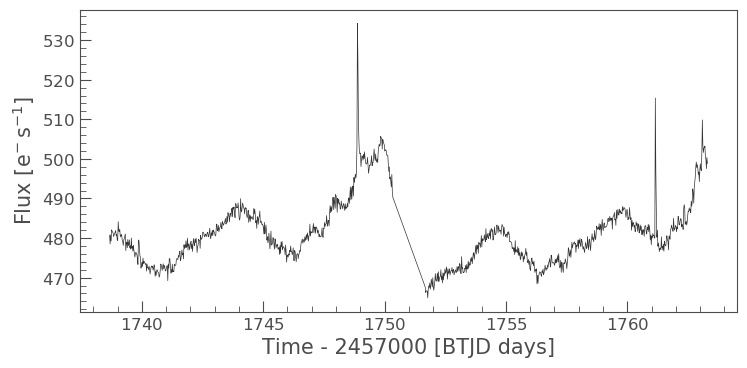

In [41]:
background_lc_per_pixel = tpf.to_lightcurve(aperture_mask=background_mask) / n_background_pixels
background_estimate_lc = background_lc_per_pixel * n_target_pixels
common_normalization = np.nanpercentile(target_lc.flux, 10)
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=1);
(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux')
corrected_lc = target_lc - background_estimate_lc.flux
corrected_lc.plot()

In [42]:
flux16 = corrected_lc.flux
error16 = corrected_lc.flux_err
time16 = corrected_lc.time

0% (2/1248) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


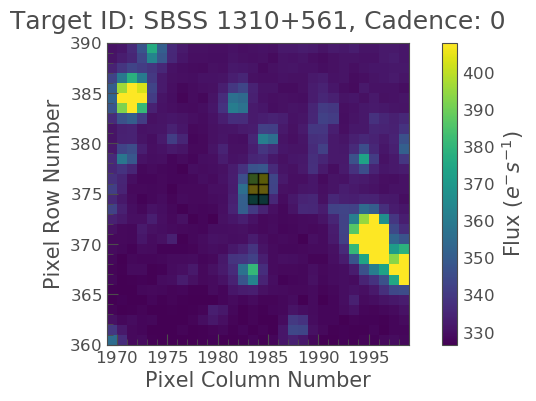

In [44]:
search_result = lk.search_tesscut('SBSS 1310+561', sector=22)
tpf = search_result.download(cutout_size=30)
target_mask = tpf.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
tpf.plot(aperture_mask=target_mask, mask_color='k')

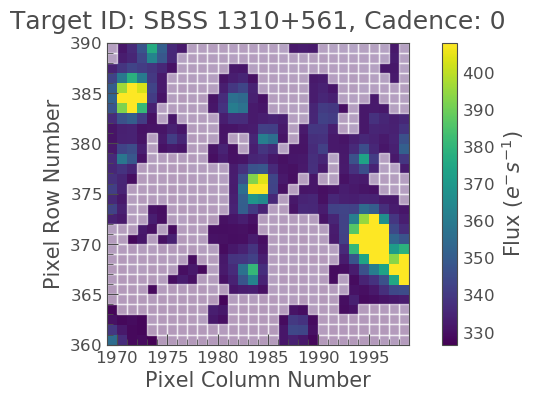

In [45]:
target_lc = tpf.to_lightcurve(aperture_mask=target_mask)
background_mask = ~tpf.create_threshold_mask(threshold=0.001, reference_pixel=None)
tpf.plot(aperture_mask=background_mask, mask_color='w')

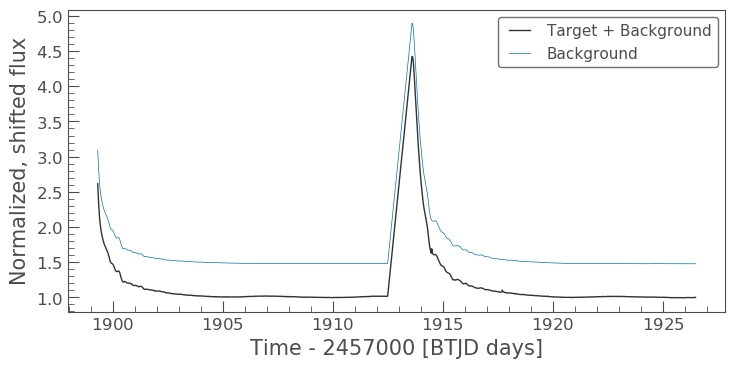

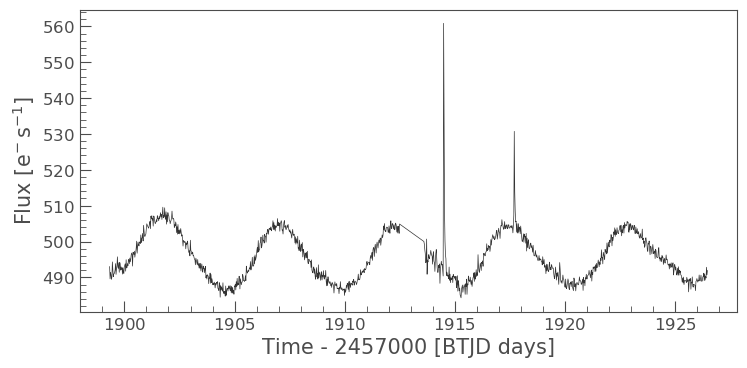

In [47]:
n_background_pixels = background_mask.sum()
background_lc_per_pixel = tpf.to_lightcurve(aperture_mask=background_mask) / n_background_pixels
background_estimate_lc = background_lc_per_pixel * n_target_pixels
common_normalization = np.nanpercentile(target_lc.flux, 10)
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=1);
(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux')
corrected_lc = target_lc - background_estimate_lc.flux
corrected_lc.plot()
#plt.savefig('sec22SBSS1310.pdf')

In [48]:
flux22 = corrected_lc.flux
time22 = corrected_lc.time
error22 = corrected_lc.flux_err






In [55]:
dat = np.array([time15, flux15,error15])

dat = dat.T

np.savetxt('Sec15Uncorrected.dat', dat, delimiter = '\t')

dat = np.array([time16, flux16,error16])

dat = dat.T

np.savetxt('Sec16Uncorrected.dat', dat, delimiter = '\t')

dat = np.array([time22, flux22,error22])

dat = dat.T

np.savetxt('Sec22Uncorrected.dat', dat, delimiter = '\t')

In [49]:
flux15C = (flux15/np.mean(flux15))-1
flux16C = (flux16/np.mean(flux16))-1
flux22C = (flux22/np.mean(flux22))-1

In [51]:
allflux = np.append(flux15C,flux16C)
allflux = np.append(allflux,flux22C)
alltime = np.append(time15,time16)
alltime = np.append(alltime,time22)
allerr = np.append(error15,error16)
allerr = np.append(allerr,error22)

(1899.3262329101562, 1926.4717407226562)

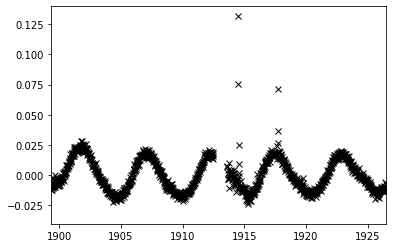

In [58]:
import matplotlib.pyplot as plt
plt.plot(alltime,allflux,'kx')
plt.xlim(time22[0],time22[-1])

In [53]:
import matplotlib.pyplot as plt

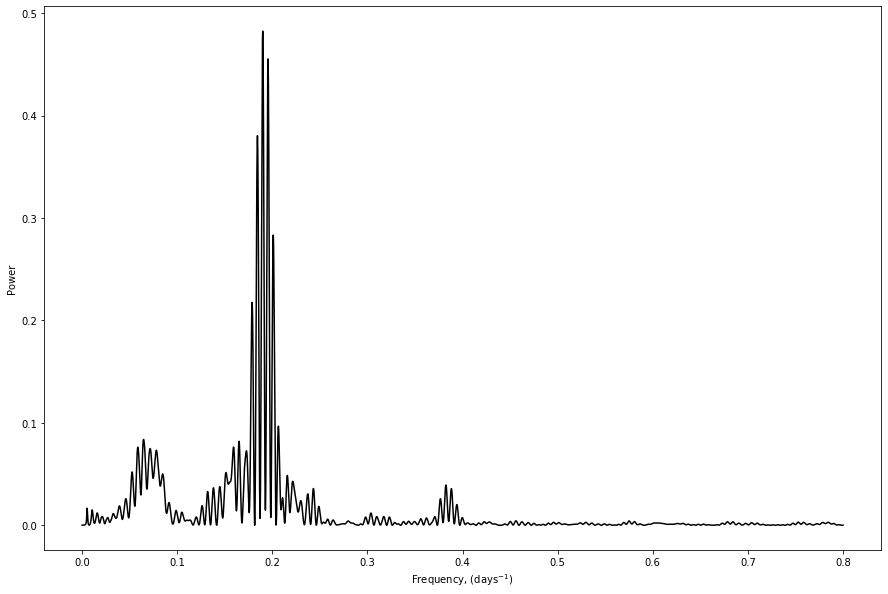

In [54]:
frequency = np.linspace(0.0001,0.8,10000)
power = LombScargle(alltime, allflux).power(frequency)
plt.figure(figsize=(15,10))
plt.plot(frequency,power, c='k')
plt.ylabel('Power')
plt.xlabel(r'Frequency, (days$^{-1}$)')
plt.savefig('SBSS1310LS.pdf')

In [51]:
1/frequency[np.argmax(power)]

5.264952037282116

In [59]:
1/5.264952037282116

0.1899352535253525

In [1]:
search_result = lk.search_tesscut('SBSS 1310+561', sector=15)
tpf = search_result.download(cutout_size=50)
target_mask = tpf.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
#tpf.plot(aperture_mask=target_mask, mask_color='k')
regressors = tpf.flux[:, ~target_mask]
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(5)
plt.plot(tpf.time, dm.values + np.arange(5)*0.2, '.')

NameError: name 'lk' is not defined

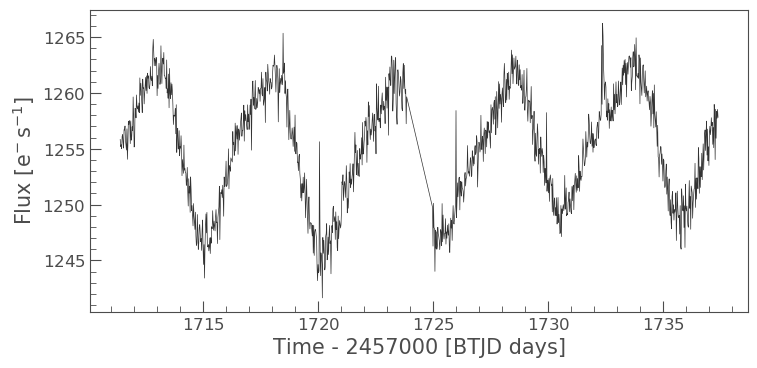

In [66]:
dm = dm.append_constant()
raw_lc = tpf.to_lightcurve(aperture_mask=target_mask)
corrector = lk.RegressionCorrector(raw_lc)
corrected_lc = corrector.correct(dm)
corrected_lc.plot()

In [67]:
flux15D = corrected_lc.flux
time15D = corrected_lc.time
error15D = corrected_lc.flux_err



dat = np.array([time15D, flux15D,error15D])

dat = dat.T

np.savetxt('Sec15Corrected.dat', dat, delimiter = '\t')


0% (3/1121) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


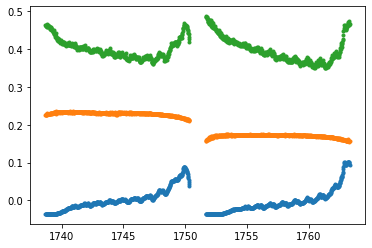

In [78]:
search_result = lk.search_tesscut('SBSS 1310+561', sector=16)
tpf = search_result.download(cutout_size=50)
target_mask = tpf.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
#tpf.plot(aperture_mask=target_mask, mask_color='k')
regressors = tpf.flux[:, ~target_mask]
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(3)
plt.plot(tpf.time, dm.values + np.arange(3)*0.2, '.')

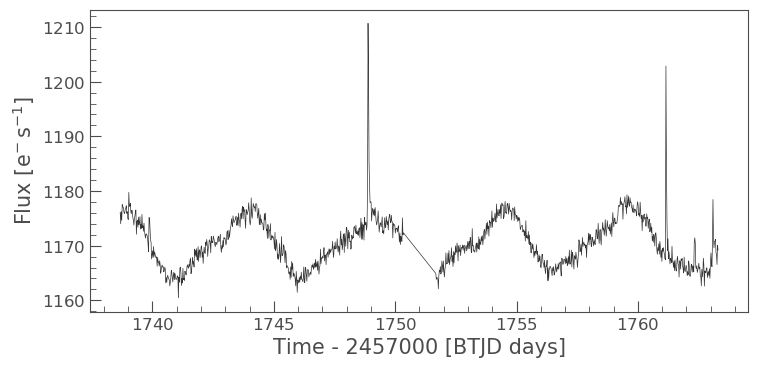

In [79]:
dm = dm.append_constant()
raw_lc = tpf.to_lightcurve(aperture_mask=target_mask)
corrector = lk.RegressionCorrector(raw_lc)
corrected_lc = corrector.correct(dm)
corrected_lc.plot()

In [80]:
flux16D = corrected_lc.flux
time16D = corrected_lc.time
error16D = corrected_lc.flux_err



dat = np.array([time16D, flux16D,error16D])

dat = dat.T

np.savetxt('Sec16Corrected.dat', dat, delimiter = '\t')


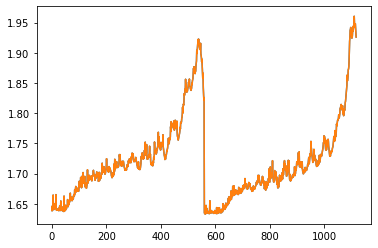

In [81]:
plt.plot(error16D)
plt.plot(error16)

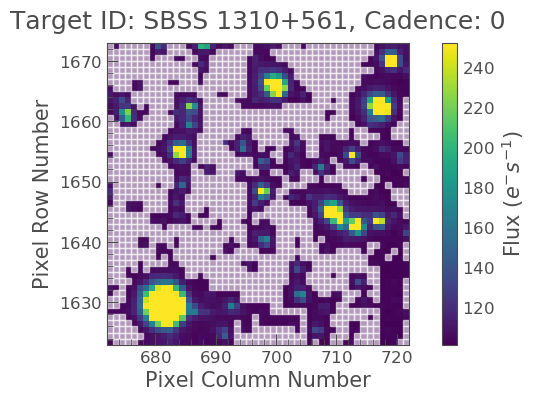

In [57]:
target_lc = tpf.to_lightcurve(aperture_mask=target_mask)
background_mask = ~tpf.create_threshold_mask(threshold=0.001, reference_pixel=None)
tpf.plot(aperture_mask=background_mask, mask_color='w')

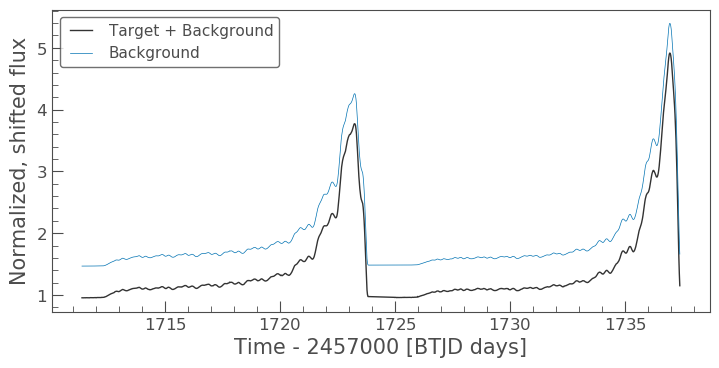

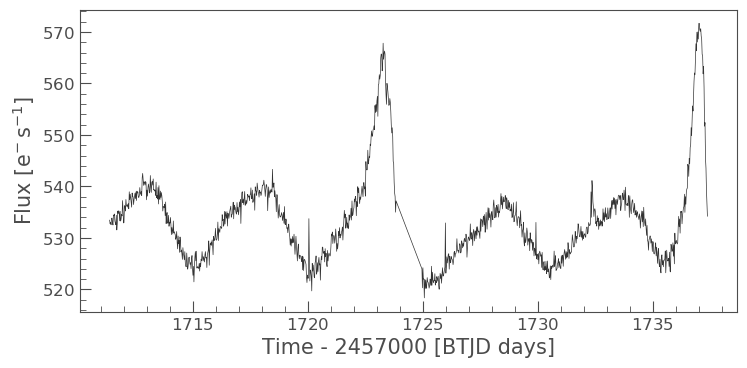

In [58]:
n_background_pixels = background_mask.sum()
background_lc_per_pixel = tpf.to_lightcurve(aperture_mask=background_mask) / n_background_pixels
background_estimate_lc = background_lc_per_pixel * n_target_pixels
common_normalization = np.nanpercentile(target_lc.flux, 10)
ax = (target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=1);
(background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux')
corrected_lc = target_lc - background_estimate_lc.flux
corrected_lc.plot()
#plt.savefig('sec22SBSS1310.pdf')

In [ ]:
flux22 = corrected_lc.flux
time22 = corrected_lc.time
error22 = corrected_lc.flux_err




